In [31]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd

In [ ]:
dataframe = pd.read_csv('dataset.csv')

In [88]:
name_start_with = 'H'
name_list=[]
for name in dataframe['Name']:
    if(name.find(name_start_with)==0):
        name_list.append(name)
name_dataframe = pd.DataFrame(name_list)
name_dataframe

,0
0,Hamza Naveed
1,Habib Ullah
2,Hunain Javed
3,Hafiz Malahim Labib.
4,Hamna Tariq Saleemi
5,Hina
6,Hamza Javed Khan
7,Husnain Ahmed
8,Hamayoun Masroor
9,Hussain afzal


In [ ]:
name_list2 = []
for name in dataframe['Name']:
    name = re.findall(r'(\w+)(\s)(\w+)(\s)(\w+)', name)
    if name != []:
        stud_Name = {"name":name[0][0] + name[0][1] + name[0][2] + name[0][3] + name[0][4]}
        name_list2.append(stud_Name)   
dataframe2 = pd.DataFrame(name_list2)
dataframe2

In [90]:
count = 0
for cgpa in dataframe['CGPA']:
    if float(cgpa) >= 3.0:
        count+=1
        
percentage = count/len(dataframe['CGPA']) *100

print("The percentage of students who have CGPA of 3.0 or above: " + str(float("{:.2f}".format(percentage)))+"%")

The percentage of students who have CGPA of 3.0 or above: 28.36%


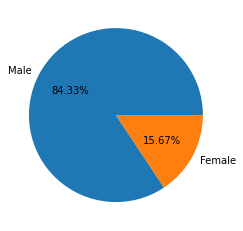

In [44]:
num_male = 0
num_female = 0

for gender in dataframe['Gender']:
    if gender == "Male":
        num_male+=1
    else:
        num_female+=1

labels = ['Male', 'Female']
record = [num_male, num_female]
plt.pie(record, labels = labels, autopct='%1.2f%%')
plt.show()

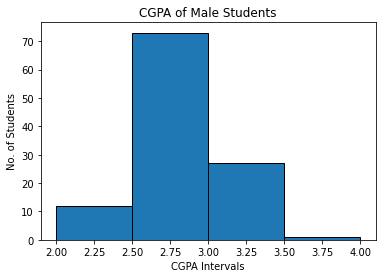

In [92]:
res_cgpa = []
for cgpa2, gender in zip(dataframe['CGPA'], dataframe['Gender']):
    if gender == 'Male':
        res_cgpa.append(cgpa2)
   
plt.hist(res_cgpa, bins=[2, 2.5, 3.0, 3.5, 4], edgecolor = 'black')
plt.title('CGPA of Male Students')
plt.xlabel('CGPA Intervals')
plt.ylabel('No. of Students')
plt.show()

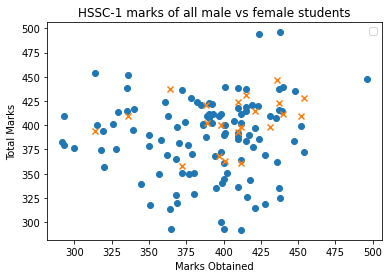

In [93]:
marks_Male = []
marks_Female = []

for gender, marks in zip(dataframe['Gender'], dataframe['HSSC-1']):
    if gender == 'Male':
        marks_Male.append(marks)
    else:
         marks_Female.append(marks)
            
i = 0
mar = len(dataframe['HSSC-1']) - len(marks_Male)
while (i < mar):
    marks_Male.append('NaN')
    i+=1

i = 0
mar = len(dataframe['HSSC-1']) - len(marks_Female)
while (i < mar):
    marks_Female.append('NaN')
    i+=1
    
grades_int = dataframe['HSSC-1']
plt.legend(["Male" , "Female"])
plt.scatter(grades_int, marks_Male, marker='o')
plt.scatter(grades_int,marks_Female, marker='x')
plt.xlabel('Marks Obtained')
plt.ylabel('Total Marks')
plt.title("HSSC-1 marks of all male vs female students")
plt.show()


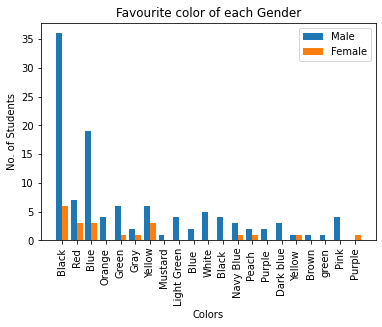

In [94]:
colors = dataframe['FavoriteColor'].unique()
color_c = {"Color":colors}
dataframe = pd.DataFrame(colors) 
dataframe = pd.DataFrame(color_c)

male = []
female = []
for color in dataframe['Color']:
    count_Male = 0
    count_Female = 0
    for color2, gndr in zip(dataframe['FavoriteColor'], dataframe['Gender']):
        if color == color2:
            if(gndr == "Male"):
                count_Male+=1
            else:
                count_Female+=1
    male.append(count_Male)
    female.append(count_Female)
    
X_axis = np.arange(len(colors)) 
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female') 
plt.xticks(X_axis, colors, rotation='vertical')
plt.xlabel("Colors")
plt.ylabel("No. of Students")
plt.title("Favourite color of each Gender")
plt.legend()
plt.show()

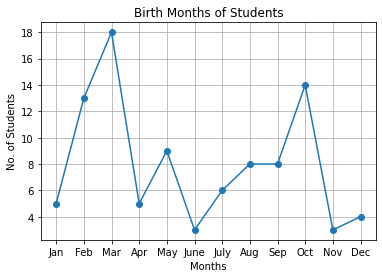

In [87]:
res_month = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for month in dataframe['BirthMonth']:
    if month == 'January':
        res_month[0] += 1
    elif month == 'February':
        res_month[1] += 1
    elif month == 'March':
        res_month[2] += 1
    elif month == 'April':
        res_month[3] += 1
    elif month == 'May':
        res_month[4] += 1
    elif month == 'June':
        res_month[5] += 1
    elif month == 'July':
        res_month[6] += 1
    elif month == 'August':
        res_month[7] += 1
    elif month == 'September':
        res_month[8] += 1
    elif month == 'October':
        res_month[9] += 1
    elif month == 'November':
        res_month[10] += 1
    elif month == 'December':
        res_month[11] += 1
    
x = np.arange(start=1, stop=13, step = 1)
month_xticks = ['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, month_xticks)
plt.plot(x, res_month, marker='o')
plt.title("Birth Months of Students")
plt.xlabel("Months")
plt.ylabel("No. of Students")
plt.grid(True)
plt.show()

HSSC-1 & HSSC-2 Marks: 
       x    y
0    440  369
1    415  408
2    388  321
3    412  440
4    364  469
..   ...  ...
129  410  349
130  403  390
131  424  324
132  351  423
133  361  335

[134 rows x 2 columns]
Correlation matrix: 
          x         y
x  1.000000  0.036607
y  0.036607  1.000000


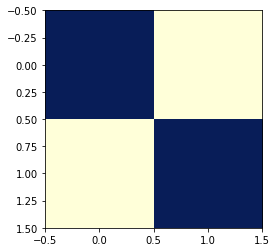

In [102]:
x = np.array(dataframe['HSSC-1'])
y = np.array(dataframe['HSSC-2'])

data = {
    'x': np.array(dataframe['HSSC-1']),
    'y':  np.array(dataframe['HSSC-2'])
}

dataframe_hsscMarks = pd.DataFrame(data, columns=['x', 'y'])
print("HSSC-1 & HSSC-2 Marks: ")
print(dataframe_hsscMarks)
matrix = dataframe_hsscMarks.corr()
print("Correlation matrix: ")
print(matrix)

plt.imshow(matrix, cmap='YlGnBu', interpolation='nearest')
plt.show()